In [18]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 2: Load uploaded dataset
df = pd.read_csv('/student_performance_large_dataset.csv')
print(df.head())

print(df.columns)


  Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0     S00001   18  Female                    48              Kinesthetic   
1     S00002   29  Female                    30          Reading/Writing   
2     S00003   20  Female                    47              Kinesthetic   
3     S00004   23  Female                    13                 Auditory   
4     S00005   19  Female                    24                 Auditory   

   Online_Courses_Completed Participation_in_Discussions  \
0                        14                          Yes   
1                        20                           No   
2                        11                           No   
3                         0                          Yes   
4                        19                          Yes   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                              71 

In [20]:
df['Pass'] = df['Exam_Score (%)'] >= 50
df['Pass'] = df['Pass'].astype(int)

In [32]:
# Step 5: Select features for model
features = [
    'Study_Hours_per_Week',
    'Attendance_Rate (%)',
    'Assignment_Completion_Rate (%)',
    'Online_Courses_Completed',
    'Use_of_Educational_Tech_Yes',
    'Self_Reported_Stress_Level_Low',
    'Self_Reported_Stress_Level_Medium',
    'Preferred_Learning_Style_Kinesthetic',
    'Preferred_Learning_Style_Reading/Writing',
    'Preferred_Learning_Style_Visual'
]

print(df.columns.tolist())


['Study_Hours_per_Week', 'Attendance_Rate (%)', 'Assignment_Completion_Rate (%)', 'Online_Courses_Completed', 'Pass', 'Use_of_Educational_Tech_Yes', 'Self_Reported_Stress_Level_Low', 'Self_Reported_Stress_Level_Medium', 'Preferred_Learning_Style_Kinesthetic', 'Preferred_Learning_Style_Reading/Writing', 'Preferred_Learning_Style_Visual']


In [35]:
# Step 2: Create the final DataFrame
df = df[features + ['Pass']]


from sklearn.model_selection import train_test_split
X = df.drop('Pass', axis=1)
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Step 4: Train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Precision:", round(precision_score(y_test, y_pred) * 100, 2), "%")
print("Recall:", round(recall_score(y_test, y_pred) * 100, 2), "%")

Accuracy: 70.3 %
Precision: 83.51 %
Recall: 80.2 %


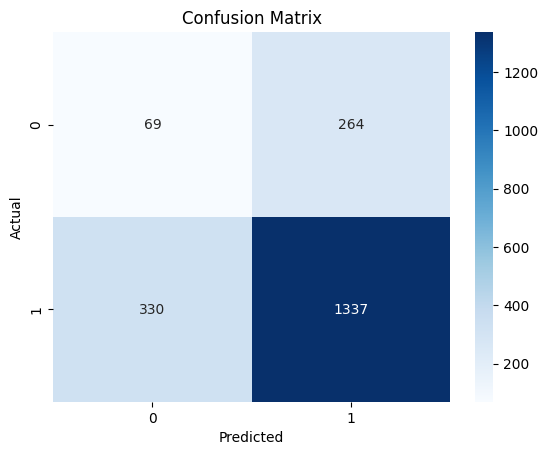

In [40]:
# Step 6: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()